# Video Game Sales with Ratings

## 0.- Importación de librerias

In [35]:
import pandas as pd # Manejo de data estructurada (Dataframe)
import numpy as np #Manejo de matrices
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns  #Gráficas sencillas

# Separar datos en Train(Entrenamiento) y Test(Prueba)
from sklearn.model_selection import train_test_split 

seed=2020 # Una semilla se usa para que el modelo sea replicable

## 1.- Comprensión del Negocio

**Ventas de videojuegos de Vgchartz y calificaciones correspondientes de Metacritic**

Motivado por el raspado web de Gregory Smith de VGChartz Video Games Sales,este conjunto de datos simplemente amplía el número de variables con otro raspado web de Metacritic. Desafortunadamente, faltan observaciones ya que Metacritic solo cubre un subconjunto de las plataformas. Además, un juego puede no tener todas las observaciones de las variables adicionales que se describen a continuación. Los casos completos son ~ 6,900

## 2.- Comprensión de los datos

| Variable | Descripción                                                                     |
|:-----------------|:----------------------------------------------------------------------------------|
| Name            | Nombre del juego                                                                 |
| Platform        | Consola en la que se ejecuta el juego                                            |
| Year_of_Release | Año de lanzamiento                                                               |
| Genre           | Categoría del juego              |
| Publisher       | Editor                                                                           |
| NA_Sales        | Ventas de juegos en América del Norte                  |
| EU_Sales        | Ventas de juegos  en la Unión Europea                        |
| JP_Sales        | Ventas de juegos  en Japón                         |
| Other_Sales     | Ventas de juegos en el resto del mundo, es decir, África, Asia excluyendo Japón, Australia, Europa excluyendo la UE.                        |
| Global_Sales    | Ventas totales en el mundo (en millones de unidades)                             |
| Critic_Score    | Puntuación agregada compilada por el personal de Metacritic                      |
| Critic_Count    | El número de críticos utilizados en la elaboración de lapuntuación de la crítica |
| User_Score      | Puntuación de los suscriptores de Metacritic                                     |
| User_Count      | número de usuarios que dieron lapuntuación de usuario                            |
| Developer       | Parte responsable de crear el juego                                              |
| Rating          | Las calificaciones de la ESRB                                                    |

### 2.1.- Recopilación de los Datos

In [2]:
# df = pd.read_csv('./dataset/videoGames_Sales.csv', index_col=False)
df = pd.read_csv('https://raw.githubusercontent.com/MayumyCH/video_game_sales_with_ratings/main/dataset/videoGames_Sales.csv', index_col=False)
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape
# INTERPRETACION:
# 16719 observaciones | registros o filas
# 16 variables | features o columnas

(16719, 16)

In [4]:
# df.info()

### 2.2  División en conjuntos de entrenamiento y prueba

In [5]:
target = 'Global_Sales'

X = df.drop([target], axis=1) # Predictoras
y = df[target]

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = seed)

### 2.3.- Exploración de los Datos

In [7]:
# Para variables Numéricas
X_train.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Count
count,13156.000000,13375.000000,13375.000000,13375.000000,13375.000000,6491.000000,6491.000000,6062.000000
mean,2006.456902,0.264480,0.143919,0.076977,0.046153,68.936527,26.306424,164.019960
std,5.924423,0.840167,0.510410,0.307166,0.170996,13.937290,18.918084,573.098167
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,12.000000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,21.000000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,36.000000,83.000000
max,2020.000000,41.360000,28.960000,10.220000,8.450000,98.000000,113.000000,10665.000000


In [8]:
X_train.describe(include = 'object')

,Name,Platform,Genre,Publisher,User_Score,Developer,Rating
count,13373,13375,13373,13332,7980,8046,7930
unique,9742,31,12,542,96,1555,8
top,Need for Speed: Most Wanted,PS2,Action,Electronic Arts,tbd,Ubisoft,E
freq,9,1735,2706,1085,1918,150,3184


## 3 Preprocesamiento de los datos

### 3.1.- Análisis y tratamiento de valores Nulos

In [9]:
import missingno as msno

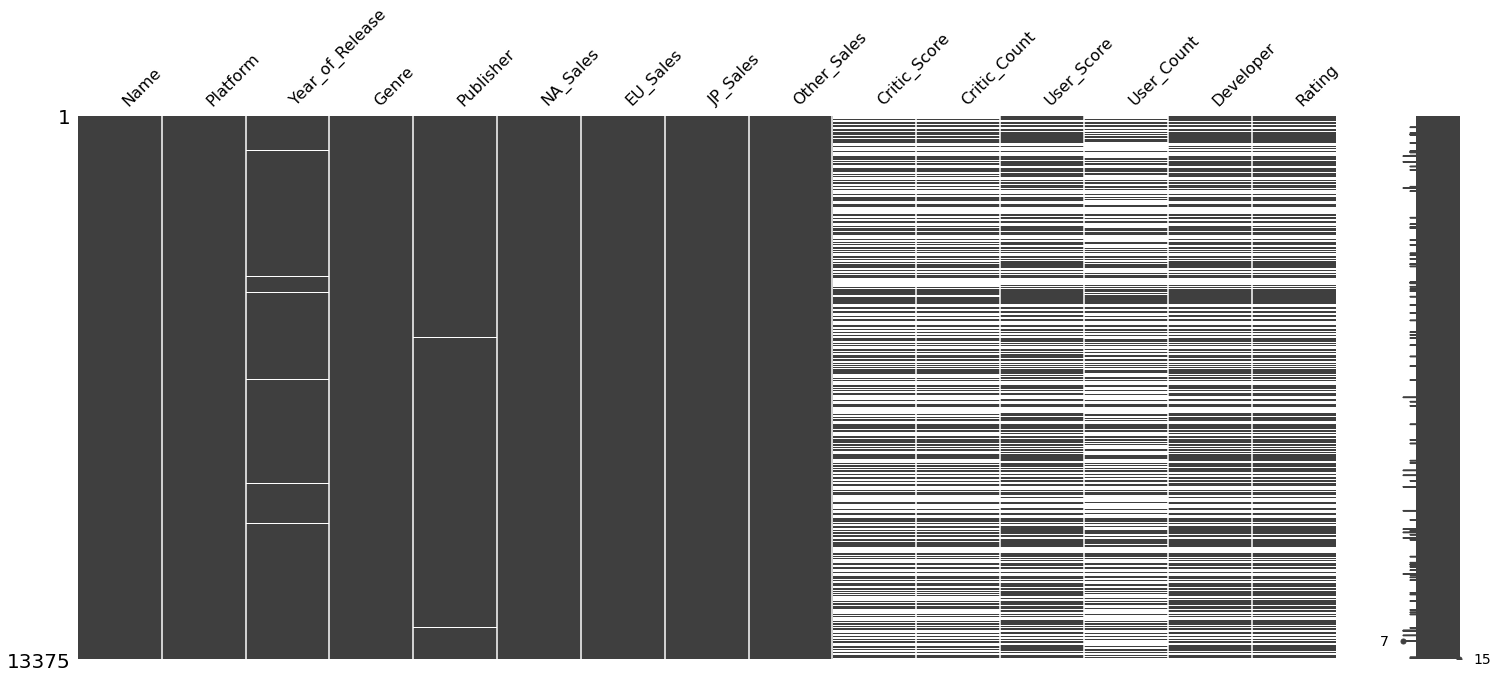

In [10]:
msno.matrix(X_train)

In [15]:
#Notamos la existencia de variables nulos
X_train.isnull().sum()

Name                  2
Platform              0
Year_of_Release     219
Genre                 2
Publisher            43
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       6884
Critic_Count       6884
User_Score         5395
User_Count         7313
Developer          5329
Rating             5445
dtype: int64

### 3.2.- Separando variables Categóricas y Numéricas

In [16]:
X_train[X_train['Name'].isnull()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
X_train = X_train[X_train["Genre"].notnull()] # ELIMINE LOS QUE NO TIENEN Genre
X_train = X_train[X_train["Year_of_Release"].notnull()] # ELIMINE LOS QUE NO TIENEN Year_of_Release

# Replacing "tbd" values with np.nan and transforming column to float type
X_train["User_Score"] = X_train["User_Score"].replace("tbd", np.nan).astype(float)

In [20]:
X_train["Year_of_Release"] = X_train["Year_of_Release"].apply(int)
X_train["Age"] = 2021 - X_train["Year_of_Release"]

In [22]:
X_train.isnull().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher            23
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Critic_Score       6789
Critic_Count       6789
User_Score         7198
User_Count         7198
Developer          5261
Rating             5371
Age                   0
dtype: int64

In [23]:
# Separamos la variable numéricas
X_train_cat = X_train.select_dtypes('object')
# Separamos la variable categóricas
X_train_num = X_train.select_dtypes('number')

In [24]:
X_train_cat.isnull().sum()

Name            0
Platform        0
Genre           0
Publisher      23
Developer    5261
Rating       5371
dtype: int64

In [25]:
# IMPUTACION
X_train_cat

,Name,Platform,Genre,Publisher,Developer,Rating
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,Action,Capcom,NaN,NaN
12743,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,Shooter,THQ,GSC Game World,M
8891,Deadly Premonition,PS3,Action,Rising Star Games,NaN,NaN
15986,Sora no Otoshimono Forte: Dreamy Season,DS,Adventure,Kadokawa Shoten,NaN,NaN
9309,Spy Hunter 2,XB,Racing,Midway Games,Midway,T
...,...,...,...,...,...,...
1661,The Magical Quest starring Mickey Mouse,SNES,Platform,Capcom,NaN,NaN
11971,Magi: The Labyrinth of Beginning,3DS,Role-Playing,Namco Bandai Games,NaN,NaN
14966,Mahou Sensei Negima! Private Lesson 2: Ojama S...,GBA,Role-Playing,Marvelous Interactive,NaN,NaN
7491,Discovery Kids: Pony Paradise,DS,Simulation,505 Games,Gimagin Games,E


In [26]:
X_train["Year_of_Release"].min()

1980

In [42]:
X_train.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,Capcom,1.06,0.82,0.05,0.28,NaN,NaN,NaN,NaN,NaN,NaN,15
12743,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007,Shooter,THQ,0.01,0.04,0.00,0.01,82.0,44.0,8.4,1088.0,GSC Game World,M,14


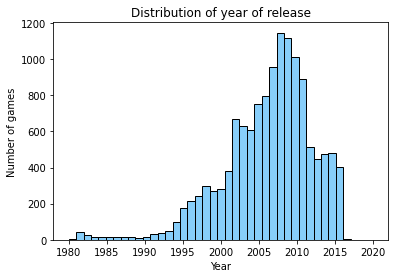

In [47]:
# Histogram plot of Year of release
num_years = X_train["Year_of_Release"].max() - X_train["Year_of_Release"].min() + 1
plt.hist(X_train["Year_of_Release"], bins=int(num_years), color="lightskyblue", edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year")
plt.ylabel("Number of games");

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2094: UserWarning: The marginal plotting function has changed to `histplot`, which does not accept the following argument(s): hist_kws.
  warnings.warn(msg, UserWarning)


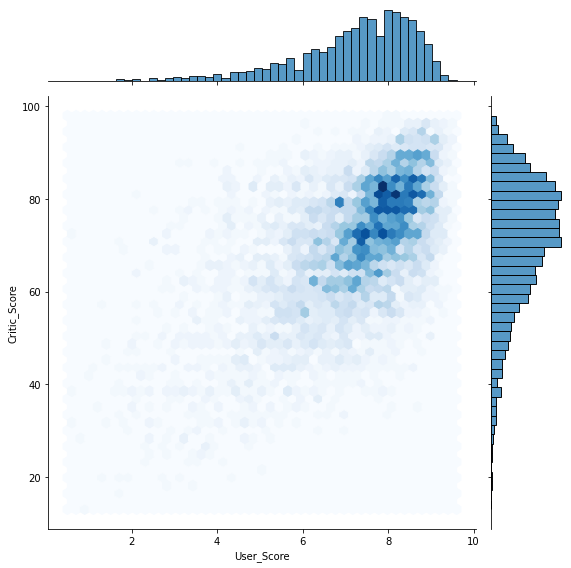

In [60]:
g = sns.jointplot(x="User_Score", y="Critic_Score", 
                  data=X_train, cmap="Blues", 
                  kind="hex", size=8, 
                  marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}});
g.ax_marg_x.grid(False)
g.ax_marg_y.grid(False);

In [61]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : "Missing Values", 1 : "% of Total Values"})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        "% of Total Values", ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [62]:
missing_values_table(X_train)

Your selected dataframe has 16 columns.
There are 7 columns that have missing values.


,Missing Values,% of Total Values
User_Score,7198,54.7
User_Count,7198,54.7
Critic_Score,6789,51.6
Critic_Count,6789,51.6
Rating,5371,40.8
Developer,5261,40.0
Publisher,23,0.2


In [70]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
      print("key", key)
      # Calculate first and third quartile
      first_quartile = df_out[key].describe()["25%"]
      third_quartile = df_out[key].describe()["75%"]

      # Interquartile range
      iqr = third_quartile - first_quartile

      # Remove outliers
      removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                  (df_out[key] >= (third_quartile + 3 * iqr))] 
      df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                  (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [69]:
X_train.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,Capcom,1.06,0.82,0.05,0.28,NaN,NaN,NaN,NaN,NaN,NaN,15
12743,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007,Shooter,THQ,0.01,0.04,0.00,0.01,82.0,44.0,8.4,1088.0,GSC Game World,M,14


In [72]:
X_train["Has_Score"] = X_train["User_Score"].notnull() & X_train["Critic_Score"].notnull()

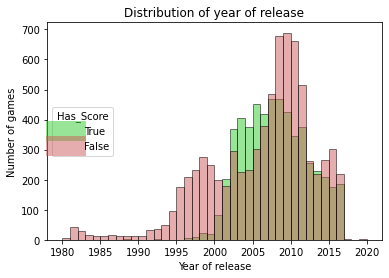

In [73]:
from matplotlib.lines import Line2D
plt.hist(X_train[X_train["Has_Score"]==True]["Year_of_Release"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(X_train[X_train["Has_Score"]==False]["Year_of_Release"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=6);

In [77]:
X_train.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,Capcom,1.06,0.82,0.05,0.28,NaN,NaN,NaN,NaN,NaN,NaN,15,False
12743,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007,Shooter,THQ,0.01,0.04,0.00,0.01,82.0,44.0,8.4,1088.0,GSC Game World,M,14,True


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3720: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


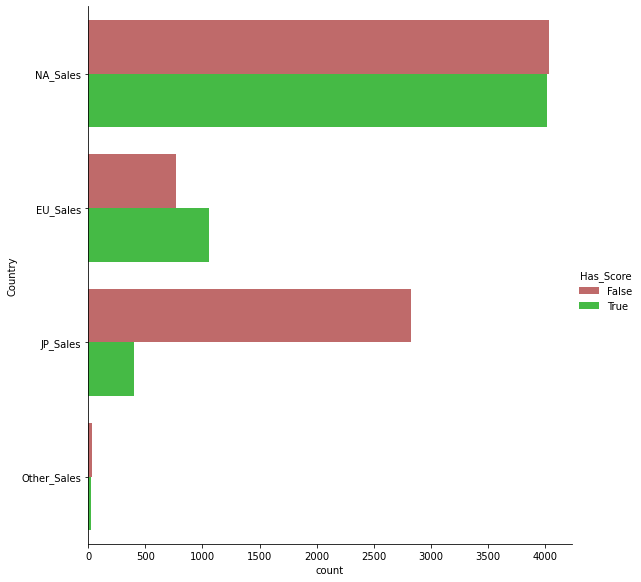

In [79]:
X_train["Country"] = X_train[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.factorplot(y="Country", hue="Has_Score", data=X_train, size=8, kind="count", palette=palette)
# sns.factorplot(y="Country", x="Global", hue="Has_Score", data=X_train, size=8, kind="bar", palette=palette,
#                estimator=lambda x: np.median(x));

In [82]:
scored = X_train.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Age
count,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000,5443.000000
mean,2007.461326,0.386371,0.232036,0.060463,0.080233,70.310674,28.891604,7.185302,176.896748,13.538674
std,4.218765,0.971345,0.706037,0.262393,0.246583,13.807995,19.142803,1.451144,600.041093,4.218765
min,1988.000000,0.000000,0.000000,0.000000,0.000000,13.000000,3.000000,0.500000,4.000000,5.000000
25%,2004.000000,0.060000,0.020000,0.000000,0.010000,62.000000,14.000000,6.500000,11.000000,10.000000
50%,2007.000000,0.140000,0.060000,0.000000,0.020000,72.000000,24.000000,7.500000,27.000000,14.000000
75%,2011.000000,0.390000,0.200000,0.010000,0.070000,81.000000,39.000000,8.200000,91.000000,17.000000
max,2016.000000,41.360000,28.960000,6.500000,8.450000,98.000000,113.000000,9.600000,10665.000000,33.000000


In [90]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [92]:
pip install --upgrade category_encoders

     |████████████████████████████████| 80 kB 7.9 MB/s 


In [94]:
import category_encoders as ce

numeric_subset = scored.select_dtypes("number").drop(columns=["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Year_of_Release"])
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

features = pd.concat([numeric_subset, categorical_subset], axis = 1)
# correlations = features.corr()["Global"].dropna().sort_values()

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [98]:
X_train.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Age,Has_Score,Country
735,Devil May Cry 3: Dante's Awakening Special Edi...,PS2,2006,Action,Capcom,1.06,0.82,0.05,0.28,NaN,NaN,NaN,NaN,NaN,NaN,15,False,NA_Sales
12743,S.T.A.L.K.E.R.: Shadow of Chernobyl,PC,2007,Shooter,THQ,0.01,0.04,0.00,0.01,82.0,44.0,8.4,1088.0,GSC Game World,M,14,True,EU_Sales
8891,Deadly Premonition,PS3,2010,Action,Rising Star Games,0.08,0.04,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN,11,False,NA_Sales
15986,Sora no Otoshimono Forte: Dreamy Season,DS,2011,Adventure,Kadokawa Shoten,0.00,0.00,0.02,0.00,NaN,NaN,NaN,NaN,NaN,NaN,10,False,JP_Sales
9309,Spy Hunter 2,XB,2003,Racing,Midway Games,0.10,0.03,0.00,0.00,57.0,22.0,NaN,NaN,Midway,T,18,False,NA_Sales


In [95]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [96]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

ValueError: ignored